In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

---
# **Problem that need to be answered in this analysis**


In this capstone project there are some question that needs to be answered:
<br><br>

1. Driver and fleet optimization : How to optimize fleet operations by increasing efficiency and reducing idle time

2. How to identify the busiest times and predict the amount of demand at a given time When and where taxi demand increases

3. Payment Preferences and Driver Income Impact Which payment methods are most popular, and how do they impact driver income

4. Relationship between Trip Fare and Distance Is there a correlation between trip distance and fare amount?

5. Trip Duration and Zone Analysis Which zones (PULocationID, DOLocationID) experience the longest travel times?
6. Impact of Surcharges on Total Fare How do surcharges (MTA taxes, surcharges, tolls) affect total fare?
7. Detecting Fraudulent Trips Are there any unusual trips that could indicate data entry errors or fraud?
8. Comparison between vendor performance Is there a difference between the average trip distance, time and cost of vendor 1 and 2

---
# **The method**

The steps applied in this project will include but are not limited to these highlighted below.

1. Data Preprocessing and Cleaning
- Handle missing values 
- Convert date-time fields into an appropriate format and then extract relevant features from the date: hour, weekday, month.
- Handle outliers in trip_distance and fare_amount-for instance, extremely high values for fare_amount.
- Map location IDs to known NYC boroughs/zones for better insights.
2. Exploratory Data Analysis
- Find peak hours, days of the week, and seasonal trends.
- Map hot zones for pickups and drop-offs based on PULocationID and DOLocationID.
- Look at fare vs. trip distance based on Rate Codes.
- Check different usage patterns among different payment methods.
3. Feature Engineering
New features to be created are as follows:
- trip duration : Time difference between dropoff and pickup.
- Trip Speed: The trip distance divided by the trip time .
- Rush Hour: Provides an indicator flag on whether it is rush hours.

In [5]:
#Put the data into dataframe format called df_raw
df_raw= pd.read_csv('D:/PURWADHIKA/New York City Taxi and Limousine Trip Record/NYC TLC Trip Record.csv',low_memory=False)
display(df_raw.head(),df_raw.tail())


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [6]:
#copy the df raw into df. later on df data will be the base dataframe to modify/cleaned
df = df_raw.copy()

---
**Step 1: Data Understanding:**

In this step, we need to understand the dimension of the data, number of duplicate value, number of null value and the statistic definition of the data for example mean, quantile , etc. 

In [7]:
print(f'Number of row and column in the dataset df are {df.shape}')
df.info()

Number of row and column in the dataset df are (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64


In [8]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [9]:
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

In [10]:
df.isna().sum()


VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [11]:
# find unique data for every column to understand better the data

pd.set_option('display.max_colwidth', 1)

listItem = []
for col in df.columns : listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [12]:
# checking the duplicate of the data
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge]
Index: []



**Step 1: Data Understanding - Result**

1. Number of row and column in the dataset df are (68211, 20)
2. ehail_fee column has all null value. This column will be dropped because there's no such a pattern that need to be investigated further

3. There are nan value in some of the column with percentage missing data as follow
<br>
    - store_and_fwd_flag 6.339154 %
    - RatecodeID 6.339154 %
    - passenger_count            6.339154  %
    - payment_type               6.339154 %
    - trip_type                  6.353814 %
    - congestion_surcharge       6.339154 %
    <br>
    These data needs to be further investigated so that the treament of this nan value can be decided. The investigation including pattern investigation

4. There are some unappropriate deffinition of data types. Here are 3 data types that  needs to be  adjusted in order 
    - lpep_pickup_datetime and lpep_dropoff_datetime:
        <br>
        Current Type: object (possibly string), Expected Type: datetime
        This data will be converted into  datetime format, because they represent date and time information. This conversion will support other further anlysis such as  calculating trip duration, filtering by specific time ranges, and other time-related analyses.

    - store_and_fwd_flag:
        <br>
        Current Type: object (posibly string with values like "Y" and "N")
        Expected Type: category (or a binary int or bool)
        This data will be converted into a category so that will reduce memory usage, and it allows for efficient filtering.

5.  Found negative value on Improvement_surcharge. Improvement surcharge is basically a fixed addition-almost always $0.30-per-trip charge to help pay for improvements and infrastructure. It's added on top of the fare and does not change based on distance or time of the trip.It is not logicall when it has negative values in this column, it may indicate Data Entry Errors or Data Processing Problems where there could be an error in importing or processing data, especially where some computation or offset would have applied. This data should be handled later.

6. Found negative value on mta_tax: mta_tax is a constant item that is added on each taxi fare in New York City and the money from which is used to benefit Metropolitan Transportation Authority. It should be positive or zero since it is an addition to fare. The negative value probably caused by an error in data entry or processing, such as improper adjustment or transformation of data. The pattern of this data needs to be observed later

7. Found negative value on extra: There is no definition of extra on PDF docs. On many cases, The extra field to indicates more surcharges such as rush hour fees or overnight charges. Similar to the mta_tax, these are the costs that come on top of the fare due to particular conditions-peak hours in this case-and would always be positive or zero but not negative. The pattern of this data needs to be observed later

8. Found negative value on congestion_surcharge: There is no definition of extracongestion_surcharg on PDF docs. 

9. There is different category that can be found on RatecodeId. On the data definition, the RatecodeID defined as follow : 
<br> 
    1=Standardrate; 2=JFK; 3=Newark; 4=Nassau or Westchester; 5=Negotiated fare; 6=Group ride
<br><br>
    In reality, however, RatecodeID for the real data contains the following values: [1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]. Notably, the value 99.0 seems a bit misplaced while considering the categories defined earlier, as this should be 6 for group rides; in this case, further investigation might be needed.

10. There is no duplicated row on the data

11. The data can be group to numerical data and categorical data which will impact how the data will be treated later. Based on the characteristic the data devided as follow :
<br>
    - Numerical data: passenger_count, trip_distance, fare_amount, extra, mta_tax, improvement_surcharge, tip_amount, tolls_amount, total_amount, congestion surcharge
    - Categorical: VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, PULocationID, DOLocationID, RatecodeID, store_and_fwd_flag, payment_type, trip_type

---

---
**Step 2: Missing Value**
<br>
In this step, the pattern of the missing values are observed and the treatment of each missing values is decided

<Axes: >

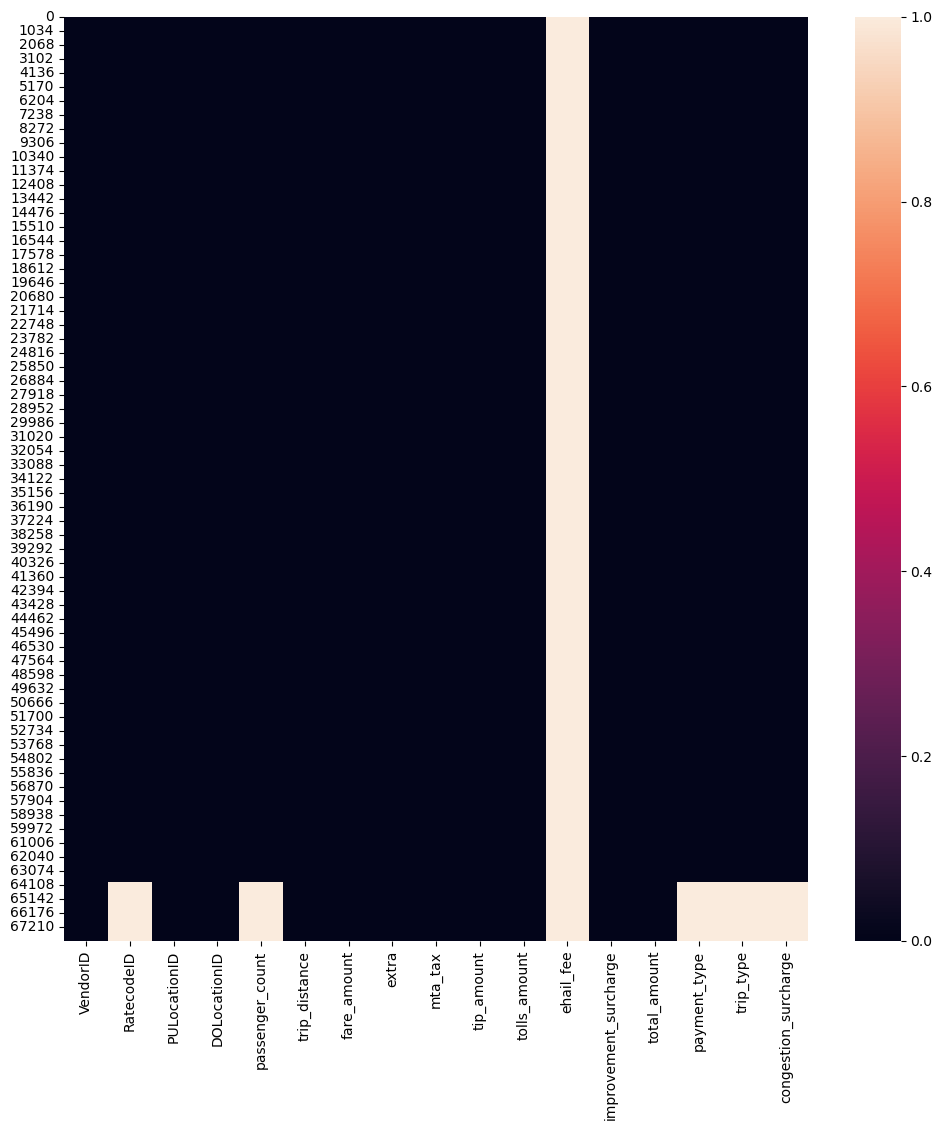

In [13]:
#plot the data to understand the distribution of the missing data
plt.figure(figsize=(12,12))
sns.heatmap(df[['VendorID','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','ehail_fee','improvement_surcharge','total_amount','payment_type','trip_type','congestion_surcharge']].isna())

The plot above showing that the missing value of the data concetrated at lowest row of the data. 
<br>
The other pattern of the missing value will be deeper investigated such as : are these missing value corralated to certain vendor , ratecodeid etc
<br>


---
**2.1: ehail_fee**
<br>
Drop the column of ehail_fee and observe the dimension of the data after 

In [14]:
#code to drop the data
df = df.drop(columns=['ehail_fee'])
#print the information of dataframe after dropping the data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

The ehail fee column has been dropped

---


---
**2.2 Identify outliers on numerical data**
<br>
To identify the outliers, create boxplots for numerical features, which helps in visualizing the spread and identifying outliers. the boxplot will visualized trip_distance, fare_amount, tip_amount, total_amount, and trip_duration.

To better understand the data the modification of data type lpep_pickup_datetime and lpep_dropoff_datetime are needed so that this data will give better information such as date and times.

In [15]:
#convert the data types to date and time types
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

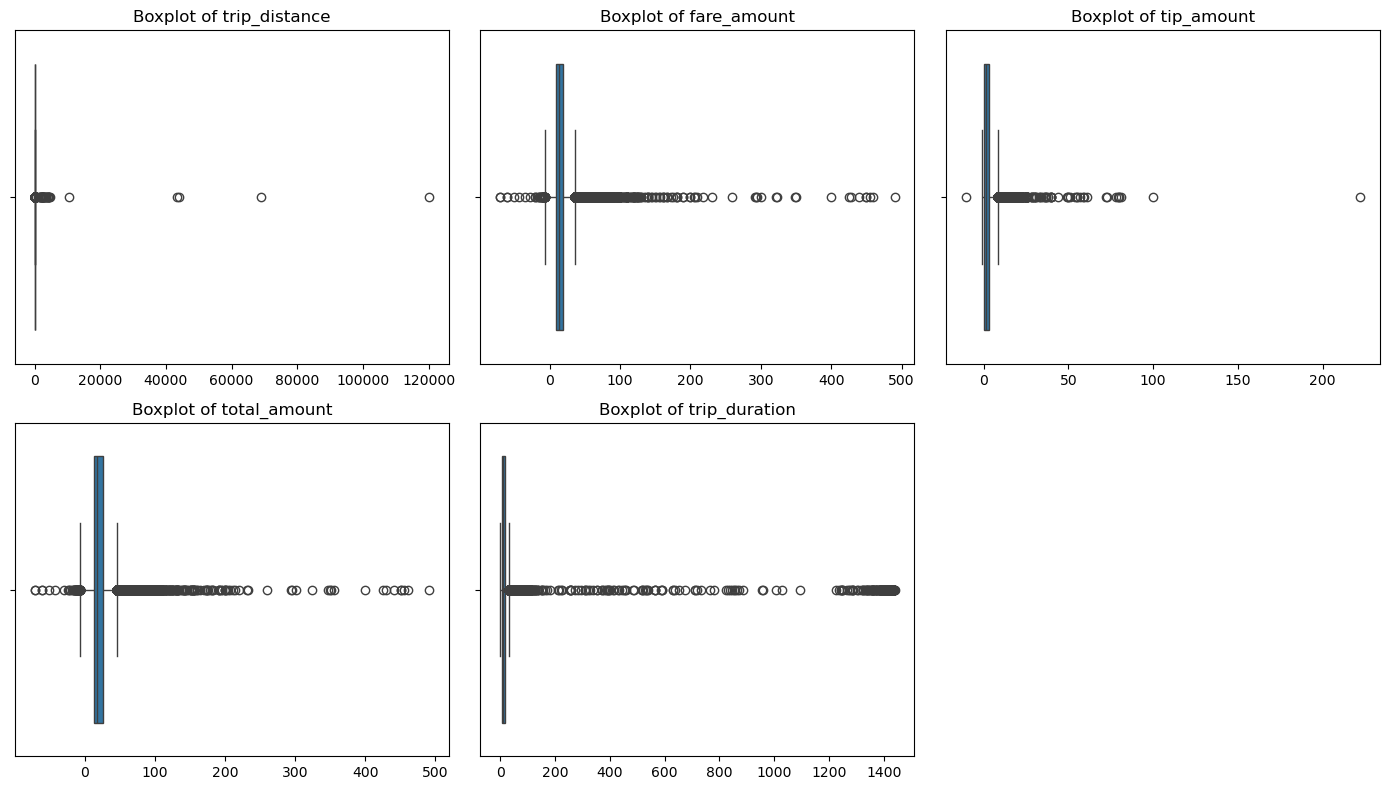

In [16]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Select relevant columns for outlier detection
features = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']

# Set up the plotting area
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


Based on the boxplot above, there are some statements that can be explained : 
1. Negative Values in fare_amount and total_amount
    - Both fare_amount and total_amount have negative values, which are visible as outliers in the boxplot display. Logically, fares and total charges should always be non-negative, hence these values are discrepancies in the data.
    - The reasons why these values are negative can't be found out without deeper analysis of some other variables, including: improvement_surcharge, mta_tax, extra, congestion_surcharge
    - Determine if this abnormal negative readings are a result of infrequent adjustments or incorrect entries in other variable. If under certain conditions, the totals are consistently negative, then those records may require special processing or be edited to conform to what is expected.
2. High Values in trip_distance
    - Some of the values of trip_distance are outrageously high. The distances go way beyond what you would normally have for a taxi travel in an urban environment.
    - The Distances that too high for an urban area, might be indication of input errors 
    - How to proceed with these cases: Filtering and analyzing these cases further for patterns or possible mistakes; Verify if these abnormal distances make sense concerning the PULocationID and DOLocationID-in other words, if they can be realistically done in an actual travel scenario.
3. Negative Values in tip_amount
    - There exist negative values in the variable tip_amount. Logically, this is inconsistent because the tip amount always has to be positive or zero.
    - These negative tips could be because of issues in data recording,since the tips for credit card payments are recorded automatically.
    - Later , need to check whether negative tips correspond vendors, or conditions that would suggest data anomalies.
4. Very High trip_distance Values Over 20,000 Miles
    - The boxplot shows some trips with distances over 20,000 miles which is almost imposible  for a single taxi ride.
    - These are almost certainly errors in data, perhaps due to improper units, misplaced decimal places, or malfunctioning GPS tracking.
    - Verify these records by comparing lpep_pickup_datetime, lpep_dropoff_datetime, and location data for further validity. Consider removing or correcting these outliers for realistic analysis.
5. Discrepancy Between trip_duration and trip_distance
    - The boxplot for trip_duration shows very high values for some trips, which may imply duration that does not logically correspond to the recorded trip_distance. It means large discrepancies between duration and distance can point to data issues such as those dealing with GPS or timestamp errors, or places where the taxi stays in one position longer than usual, like heavy flow or stops.
    - Manually check the cases for trip_duration and trip_distance to see if some records need correction. Also, calculate the average speed for those trips, as unrealistic speed or distances also suggest errors in data.

**2.2.1 Identify negative value on fare_amount and total_amount**
<br>
There are possibilities that the negative_value at fare_amount and total_amount is impacted by the negative value of other datas. So in this step the distribution and the number of the negative value of other data will be observed

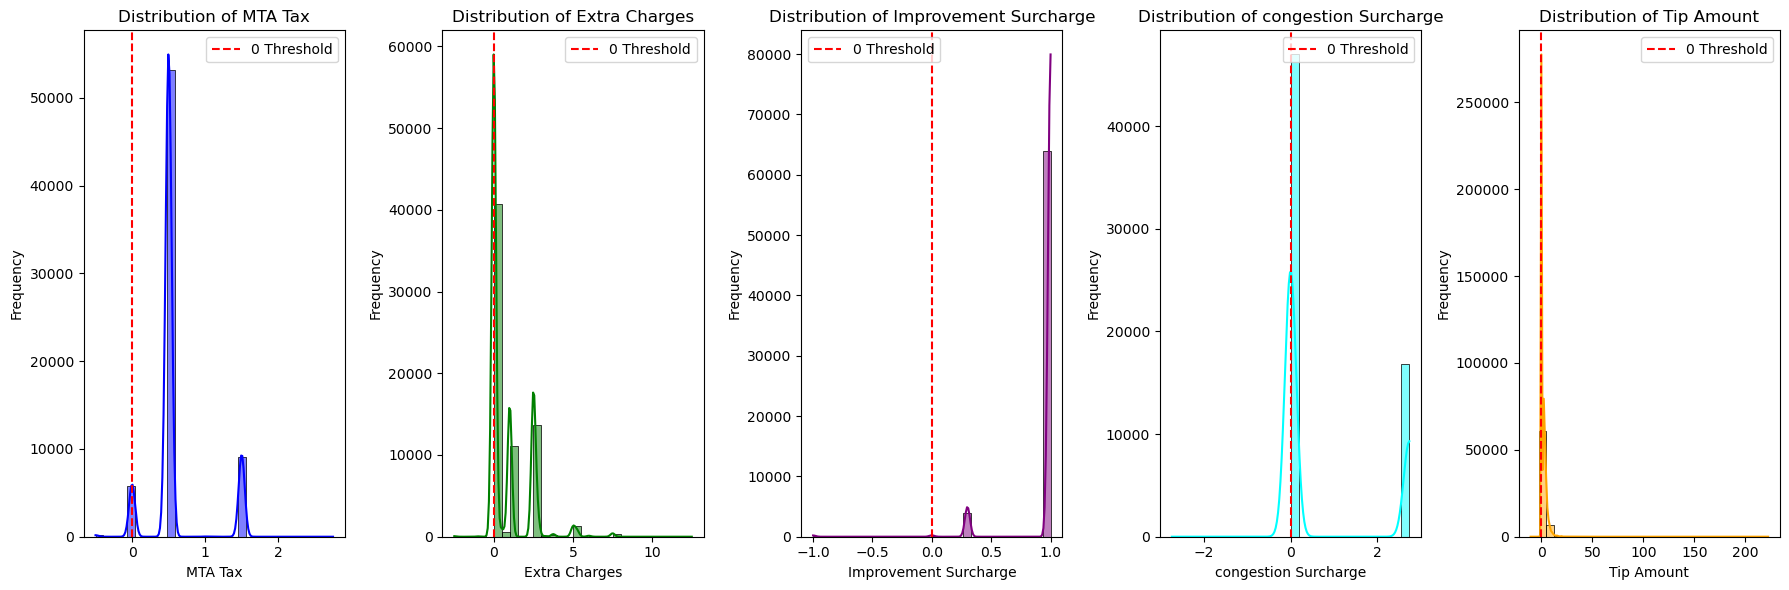

In [17]:
# Set up the plotting area
plt.figure(figsize=(18, 6))

# Plot for mta_tax
plt.subplot(1, 5, 1)
sns.histplot(df['mta_tax'], bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of MTA Tax")
plt.xlabel("MTA Tax")
plt.ylabel("Frequency")
plt.legend()

# Plot for extra
plt.subplot(1, 5, 2)
sns.histplot(df['extra'], bins=30, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of Extra Charges")
plt.xlabel("Extra Charges")
plt.ylabel("Frequency")
plt.legend()

# Plot for Improvement_surcharge
plt.subplot(1, 5, 3)
sns.histplot(df['improvement_surcharge'], bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of Improvement Surcharge")
plt.xlabel("Improvement Surcharge")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 5, 4)
sns.histplot(df['congestion_surcharge'], bins=30, kde=True, color='cyan')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of congestion Surcharge")
plt.xlabel("congestion Surcharge")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 5, 5)
sns.histplot(df['tip_amount'], bins=30, kde=True, color='orange')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of Tip Amount")
plt.xlabel("Tip Amount")
plt.ylabel("Frequency")
plt.legend()


# Display the plots
plt.tight_layout()
plt.show()


Based on the distribution graph above there are some small amount of negative value on those data. But the result of negative value later on will impact the revenue. so that, this negative value need to be understood and treated

In [18]:
# Identify negative values in the specified columns
negative_improvement_surcharge = df[df['improvement_surcharge'] < 0]
negative_mta_tax = df[df['mta_tax'] < 0]
negative_extra = df[df['extra'] < 0]
negative_congestion_surcharge = df[df['congestion_surcharge'] < 0]
negative_tip_amount = df[df['tip_amount'] < 0]

negative_fare = df[df['fare_amount'] < 0]
negative_total = df[df['total_amount'] < 0]


# Print the counts of negative values
print(f"Negative Fare amount Count: {negative_fare.shape[0]}")
print(f"Negative Total Amount Count: {negative_total.shape[0]}")
print(f"Negative Improvement Surcharge Count: {negative_improvement_surcharge.shape[0]}")
print(f"Negative MTA Tax Count: {negative_mta_tax.shape[0]}")
print(f"Negative Extra Count: {negative_extra.shape[0]}")
print(f"Negative Congestion Surchage: {negative_congestion_surcharge.shape[0]}")
print(f"Negative Tip amount: {negative_tip_amount.shape[0]}")

#print("Negative Improvement Surcharge Examples:\n", negative_improvement_surcharge.head())
#print("Negative MTA Tax Examples:\n", negative_mta_tax.head())
#print("Negative Extra Examples:\n", negative_extra.head())
#print("Negative Congestion Surchage:\n", negative_congestion_surcharge.head())

Negative Fare amount Count: 176
Negative Total Amount Count: 179
Negative Improvement Surcharge Count: 174
Negative MTA Tax Count: 165
Negative Extra Count: 80
Negative Congestion Surchage: 3
Negative Tip amount: 9


In [19]:
# Check for negative values in improvement_surcharge, mta_tax, extra, and congestion_surcharge
surcharge_columns = ['fare_amount','improvement_surcharge', 'mta_tax', 'extra', 'congestion_surcharge','tip_amount']

# negative fare_amount records
#print("Proportion of negative values in surcharges for negative fare_amount:")
#for column in surcharge_columns:
#    proportion_neg_fare = (negative_fare[column] < 0).mean() * 100
#    print(f"{column}: {proportion_neg_fare:.2f}%")

# proportion negative total_amount records. percentage calculation de 
print("\nProportion of negative values in surcharges for negative total_amount:")
for column in surcharge_columns:
    proportion_neg_total = (negative_total[column] < 0).mean() * 100
    print(f"{column}: {proportion_neg_total:.2f}%")


print("\n--------------------------------------------------------------------")
#in this code , check the location of negative value of each column relatively to th total_amount negative value
# the the percentage of negative_value for each column will be calculated relatively to total negative value on the column itself
for column in surcharge_columns:
    # Calculate the proportion relative to the total negative values in the surcharge column itself
    total_neg_in_column = (df[column] < 0).sum()
    proportion_neg_total = (negative_total[column] < 0).sum() / total_neg_in_column * 100 if total_neg_in_column > 0 else 0
    print(f"{column}: {proportion_neg_total:.2f}%")



Proportion of negative values in surcharges for negative total_amount:
fare_amount: 98.32%
improvement_surcharge: 97.21%
mta_tax: 92.18%
extra: 44.69%
congestion_surcharge: 1.68%
tip_amount: 5.03%

--------------------------------------------------------------------
fare_amount: 100.00%
improvement_surcharge: 100.00%
mta_tax: 100.00%
extra: 100.00%
congestion_surcharge: 100.00%
tip_amount: 100.00%


The pattern of negative values of some of the variable has been observed. Based on the result of the observation it has been found that all negative value in fare_amount, improvement_surcharge,mta_tax, extra, congestion_surcharge, tip_amount are located on the same row of negative total_amount. 
<br>
The next step after knowing the pattern is check whether this pattern is impacted by certain type of payment type or certain vendor ID. Also check the pattern on data store_and_fwd_flag

In [20]:
#check payment distribution
payment_type_distribution = negative_total['payment_type'].value_counts(normalize=True) * 100

print("Percentage distribution of Payment_type for records with negative total_amount:")
print(payment_type_distribution)

#check if dispute and no charge
no_charge_or_dispute = payment_type_distribution.loc[[3, 4]] if 3 in payment_type_distribution.index and 4 in payment_type_distribution.index else None

if no_charge_or_dispute is not None:
    total_percentage = no_charge_or_dispute.sum()
    print(f"\nTotal percentage of 'No charge' and 'Dispute' Payment_type: {total_percentage:.2f}%")
else:
    print("\n'No charge' and 'Dispute' Payment_type records are not present.")

Percentage distribution of Payment_type for records with negative total_amount:
payment_type
3.0    79.885057
4.0    18.390805
2.0    1.724138 
Name: proportion, dtype: float64

Total percentage of 'No charge' and 'Dispute' Payment_type: 98.28%


Since nearly all the negative records amount to 98.28% of total_amount for "No charge" or "Dispute," this level of entry is likely intentional for recording trips that were not billed, "No charge," or are under dispute, "Dispute."

The high percentage of the data gives an indication of the fact that the negative values in this context is intentional. This will reduce the need for cleaning the data with regard to setting such values at zero or removing them, since the data might represent real situations where the fares were disputes or challenged.

So in this case, the value will keep  as is, give flagging and not correct them. Later on the data won't be calculated on revenue related calculation or visualization

In [21]:
# Check the distribution of VendorID for records with negative total_amount
vendor_distribution = negative_total['VendorID'].value_counts(normalize=True) * 100
print("Percentage distribution of VendorID for records with negative total_amount:")
print(vendor_distribution)

# Check the distribution of store_and_fwd_flag for records with negative total_amount
store_and_fwd_distribution = negative_total['store_and_fwd_flag'].value_counts(normalize=True) * 100
print("\nPercentage distribution of store_and_fwd_flag for records with negative total_amount:")
print(store_and_fwd_distribution)

Percentage distribution of VendorID for records with negative total_amount:
VendorID
2    100.0
Name: proportion, dtype: float64

Percentage distribution of store_and_fwd_flag for records with negative total_amount:
store_and_fwd_flag
N    100.0
Name: proportion, dtype: float64


-  all the negative total_amount entries are related to VendorID 2, this may mean that the negative values are an attribute specific to transactions handled by this particular vendor.
This may be the result of Vendor 2 handling refunds differently, voided trips, or disputes, or possibly some quirky way in which Vendor 2 processes and books transactions with no charges or contested fares.
- The fact that all records with a negative total_amount were dispatched in real time-store_and_fwd_flag = 'N'-implies that these records were sent immediately after the trip and as such weren't held in memory for transmission later on. This would indicate that the negative values do not, in fact, reflect delayed or batch processing of the data but instead characterize the instantaneous status at the point in time of such transactions when it is being processed, possibly due to some special business rules regarding immediate billing adjustments by Vendor 2.
- To decide whether this negative will be ignored or not on the calculation it is better to consult with the domain expert, meanwhile flagging the data will be done until there is some discussion with the domain expert

In [22]:
#handling the negative values by flagging the values in the column

# Add a new column 'is_negative_total' to flag records with negative total_amount
df['is_negative_total'] = df['total_amount'] < 0

# View flagged records i
negative_records = df[df['is_negative_total']]
print("Flagged records with negative total_amount:")
print(negative_records[['total_amount', 'payment_type', 'VendorID', 'store_and_fwd_flag']].head())


Flagged records with negative total_amount:
      total_amount  payment_type  VendorID store_and_fwd_flag
662  -4.5           3.0           2         N                
898  -4.5           4.0           2         N                
1317 -11.1          3.0           2         N                
1686 -5.3           4.0           2         N                
1864 -5.2           3.0           2         N                


The new column has been added to the dataframe as flagging to the negative total amount

---

---
**2.2.2 Outliers in trip distance and trip duration**
<br>
The method that will be used to remove the outliers in the data will be using the IQR. But it must be noted that
1. Based on the TCL policy  https://www.nyc.gov/site/tlc/about/fatigued-driving-prevention-frequently-asked-questions.page , Maximum driving hours for the driver is 10 hours within 24 hours. TLC will count the time when a driver has a passenger in the vehicle ("passenger time"). Drivers will be limited to 10 hours of passenger time in a 24-hour period. So trip duration more than 10 hours continiously may be counted as outliers.
2. for the trip distance there might be unique route with long distance where the data will condidered as an outliers by the formula but actually is not an outliers

In [101]:
# Calculate Q1 and Q3
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
df['outliers_trip'] = (df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)
outliers = df[(df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)]
print(f"Number of outliers in trip distance: {len(outliers)}")

Number of outliers in trip distance: 5774


In [102]:
# Group by PULocationID and DOLocationID and calculate total trips and outliers
summary = (
    df.groupby(['PULocationID', 'DOLocationID'])
    .agg(
        Total_Trips=('trip_distance', 'size'),
        Total_Outliers=('outliers_trip', 'sum')
    )
    .reset_index()
)

# Create a route column for better representation
summary['Route'] = summary['PULocationID'].astype(str) + ' → ' + summary['DOLocationID'].astype(str)

# Step 3: Display the summary table
print(summary[['Route', 'Total_Trips', 'Total_Outliers']])

          Route  Total_Trips  Total_Outliers
0     1 → 264    1            0             
1     3 → 3      1            0             
2     3 → 32     1            0             
3     3 → 51     1            0             
4     3 → 74     1            1             
...      ...    ..           ..             
5923  265 → 237  1            0             
5924  265 → 248  1            1             
5925  265 → 251  1            0             
5926  265 → 264  5            1             
5927  265 → 265  21           2             

[5928 rows x 3 columns]


In [103]:
# Find pairs where Total Trips is equal to Total Outliers
same_trips_and_outliers = summary[summary['Total_Trips'] == summary['Total_Outliers']]

# Display the results
print(same_trips_and_outliers[['Route', 'Total_Trips', 'Total_Outliers']])
print(same_trips_and_outliers.head())

          Route  Total_Trips  Total_Outliers
4     3 → 74     1            1             
6     3 → 243    1            1             
12    7 → 13     1            1             
13    7 → 14     2            2             
15    7 → 20     1            1             
...      ...    ..           ..             
5915  265 → 82   2            2             
5916  265 → 92   7            7             
5917  265 → 117  1            1             
5918  265 → 122  1            1             
5924  265 → 248  1            1             

[1792 rows x 3 columns]
    PULocationID  DOLocationID  Total_Trips  Total_Outliers    Route
4   3             74            1            1               3 → 74 
6   3             243           1            1               3 → 243
12  7             13            1            1               7 → 13 
13  7             14            2            2               7 → 14 
15  7             20            1            1               7 → 20 


In [104]:
# Sum the number of outliers
total_outliers_count = same_trips_and_outliers['Total_Outliers'].sum()

# Print the total number of outliers
print(f"Total number of outliers for pairs with equal trips and outliers: {total_outliers_count}")

Total number of outliers for pairs with equal trips and outliers: 3487


In our analysis of the trip distances using the IQR approach, we see 5,774 records as outliers in total. This is all trip distances that fall outside the set thresholds using the computation of the IQR.

However, consider that 3,487 of these outlier records represent unique routes-that are combinations of PULocationID and DOLocationID. These are routes that have been singled out for having trip distances that were considered as outliers according to the formula for the IQR.

What it means, in other words, is that even though these 3,487 records of outliers are statistically valid records, they should not be counted in our outlier counts because we also have to count general performance or patterns for regular routes. This is so because the unique routes could be representing uncommon trips that fail to represent the standard operating patterns observed in the greater part of the trips.

Therefore, in this context, we can conclude that:

The total number of 5,774 outlier trips are extreme values in the dataset using the IQR method.
The 3,487 unique route records that show up as outliers might not be treated as outliers for the analysis of common trip patterns since they could by nature skew the analysis because their nature is already unique.
This distinction is important and helps us remain focused on typical trip behaviors that provide more useful insights for the distances of the majority of routes.

After we identifed which data are the real outliers, we need to update the flag of outliers in the column 'outliers_trip'

In [110]:
# identified the unique route that previously identified as ouliers
unique_routes = same_trips_and_outliers[['PULocationID', 'DOLocationID']]

In [111]:
unique_routes.count()
unique_routes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 4 to 5924
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PULocationID  1792 non-null   int64
 1   DOLocationID  1792 non-null   int64
dtypes: int64(2)
memory usage: 42.0 KB


In [112]:

unique_route_set = set(unique_routes.itertuples(index=False, name=None))

# Update 'outliers_trip' flag to False for rows that match these unique routes
df['outliers_trip'] = df.apply(
    lambda row: False if (row['PULocationID'], row['DOLocationID']) in unique_route_set else row['outliers_trip'],
    axis=1
)

# Confirm the update by checking the count of remaining outliers
remaining_outliers = df['outliers_trip'].sum()
print(f"Remaining outliers after excluding unique routes: {remaining_outliers}")


Remaining outliers after excluding unique routes: 2287


In [115]:
# Count the number of True and False values in the 'outliers_trip' column
outliers_count = df['outliers_trip'].value_counts()

# Print the count of True and False values
print(outliers_count)

outliers_trip
False    65924
True     2287 
Name: count, dtype: int64


After this identification, the flag of ouliers_count has been updated. So the remaining identifed outliers are 2287 datas.

Next step, is we need to identified the 2287 data that has been identified as outliers and analyzing if this data has hidden pattern. In this case, the data is isolated. The data that will be observed are the data with number of Total_Tips is not the same as Total outliers and the Total_outliers values > 0

In [ ]:
filtered_routes = summary[(summary['Total_Trips'] != summary['Total_Outliers']) & 
    (summary['Total_Outliers'] > 0)]

#Display the results
print(filtered_routes[['Route', 'Total_Trips', 'Total_Outliers']])
filtered_routes.Total_Outliers.describe()

          Route  Total_Trips  Total_Outliers
10    7 → 7      476          2             
14    7 → 17     2            1             
17    7 → 37     4            3             
20    7 → 48     7            1             
24    7 → 56     4            2             
...      ...    ..           ..             
5895  263 → 236  7            1             
5907  264 → 264  131          1             
5919  265 → 123  2            1             
5926  265 → 264  5            1             
5927  265 → 265  21           2             

[737 rows x 3 columns]


count    737.000000
mean     3.103121  
std      7.892636  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      3.000000  
max      172.000000
Name: Total_Outliers, dtype: float64

The resut is showing that there are some routes that have 172 record that identified as an outliers. This might be uncommon because if thats happen this might be that the identified outliers are the real distance of the route

Route with maximum outliers:
      PULocationID  DOLocationID  Total_Trips  Total_Outliers     Route
1959  74            138           190          172             74 → 138

Investigating trips for the route:
PULocationID: 74, DOLocationID: 138
count    190.000000
mean     6.513842  
std      1.240303  
min      0.000000  
25%      6.620000  
50%      6.720000  
75%      6.807500  
max      8.260000  
Name: trip_distance, dtype: float64


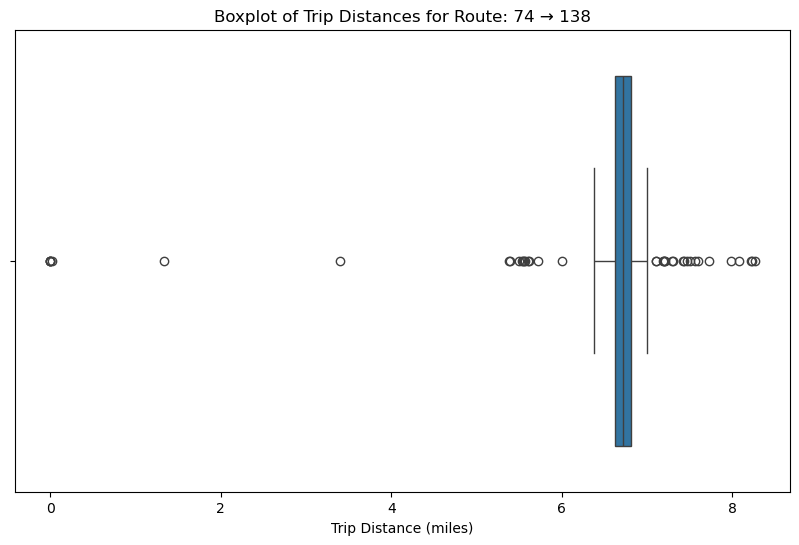


Payment type distribution for the route:
payment_type
1.0    159
2.0    27 
4.0    1  
Name: count, dtype: int64

Vendor ID distribution for the route:
VendorID
2    168
1    22 
Name: count, dtype: int64


In [107]:
# Identify the route with the maximum number of outliers
max_outlier_route = filtered_routes[filtered_routes['Total_Outliers'] == filtered_routes['Total_Outliers'].max()]

# Display the route information
print("Route with maximum outliers:")
print(max_outlier_route)

# Extract the specific PULocationID and DOLocationID for further investigation
pu_location_id = max_outlier_route['PULocationID'].values[0]
do_location_id = max_outlier_route['DOLocationID'].values[0]

#trips that associated with this data
investigation_df = df[(df['PULocationID'] == pu_location_id) & (df['DOLocationID'] == do_location_id)]

# df describe for the statistic function
print("\nInvestigating trips for the route:")
print(f"PULocationID: {pu_location_id}, DOLocationID: {do_location_id}")
print(investigation_df['trip_distance'].describe())

# plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=investigation_df, x='trip_distance',y=None, showfliers=True, legend=False)
plt.title(f'Boxplot of Trip Distances for Route: {pu_location_id} → {do_location_id}')
plt.xlabel('Trip Distance (miles)')
plt.show()

# check other variable that may relate to this outliers
payment_type_counts = investigation_df['payment_type'].value_counts()
print("\nPayment type distribution for the route:")
print(payment_type_counts)

vendorid_counts = investigation_df['VendorID'].value_counts()
print("\nVendor ID distribution for the route:")
print(vendorid_counts)


In [45]:
# Calculate Q1 and Q3
Q1_dur = df['trip_duration'].quantile(0.25)
Q3_dur = df['trip_duration'].quantile(0.75)
IQR_dur = Q3_dur - Q1_dur

# Define lower and upper bounds
lower_bound_dur = Q1_dur - 1.5 * IQR_dur
upper_bound_dur = Q3_dur + 1.5 * IQR_dur

# Flag outliers
df['outliers_duration'] = (df['trip_duration'] < lower_bound_dur ) | (df['trip_duration'] > upper_bound_dur)
outliers_dur = df[(df['trip_duration'] < lower_bound_dur ) | (df['trip_duration'] > upper_bound_dur)]
print(f"Number of outliers in trip duration: {len(outliers_dur)}")

Number of outliers in trip duration: 3559


In [69]:
df['outliers_trip'].head(100)

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    True 
98    False
99    False
Name: outliers_trip, Length: 100, dtype: bool

---
**2.3 Nan value investigation and treatment**
<br>
These datas has same percentage of missing values.
- store_and_fwd_flag 6.339154 %
- RatecodeID 6.339154 %
- passenger_count            6.339154  %
- payment_type               6.339154 %
- trip_type                  6.353814 %
- congestion_surcharge       6.339154 %


In [108]:
#extract features for the dates so that we can understand detail and creates grouping based on the dates
df['pickup_hour'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.hour
df['pickup_day'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.dayofweek
df['pickup_date'] = df['lpep_pickup_datetime'].dt.date
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month      
df['is_weekend'] = df['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend indicator
df['pickup_year'] = df['lpep_pickup_datetime'].dt.year


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [ ]:
missing_data = df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_data)


Percentage of missing values in each column:
 VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       6.339154
RatecodeID               6.339154
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          6.339154
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             6.339154
trip_type                6.353814
congestion_surcharge     6.339154
pickup_hour              0.000000
pickup_day               0.000000
pickup_date              0.000000
pickup_month             0.000000
is_weekend               0.000000
dtype: float64


In [ ]:
# Step 1.2: Analyze patterns in missing data

# Vendor-based missing data analysis
vendor_missing_data = df.groupby('VendorID').apply(lambda x: x.isnull().mean() * 100, include_groups=False)
print("Missing data percentage by VendorID:\n", vendor_missing_data)

Missing data percentage by VendorID:
           lpep_pickup_datetime  lpep_dropoff_datetime  store_and_fwd_flag  \
VendorID                                                                    
1         0.0                   0.0                    1.370010             
2         0.0                   0.0                    7.127811             

          RatecodeID  PULocationID  DOLocationID  passenger_count  \
VendorID                                                            
1         1.370010    0.0           0.0           1.370010          
2         7.127811    0.0           0.0           7.127811          

          trip_distance  fare_amount  extra  ...  improvement_surcharge  \
VendorID                                     ...                          
1         0.0            0.0          0.0    ...  0.0                     
2         0.0            0.0          0.0    ...  0.0                     

          total_amount  payment_type  trip_type  congestion_surcharge  \
Ve

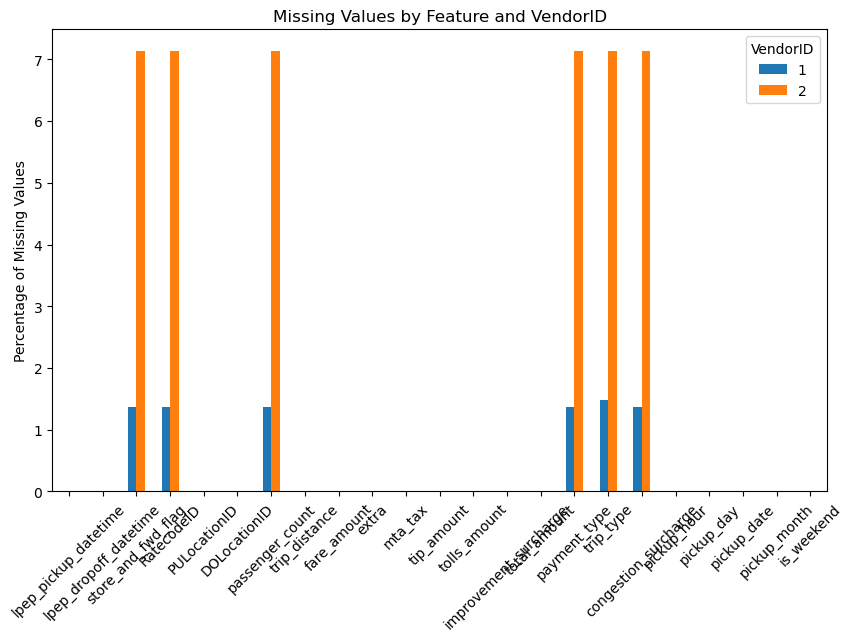

In [ ]:
# Plot missing values by VendorID
vendor_missing_data.T.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values by Feature and VendorID")
plt.xticks(rotation=45)
plt.show()

Missing data percentage by Pickup Hour:
              VendorID  lpep_pickup_datetime  lpep_dropoff_datetime  \
pickup_hour                                                          
0            0.0       0.0                   0.0                     
1            0.0       0.0                   0.0                     
2            0.0       0.0                   0.0                     
3            0.0       0.0                   0.0                     
4            0.0       0.0                   0.0                     
5            0.0       0.0                   0.0                     
6            0.0       0.0                   0.0                     
7            0.0       0.0                   0.0                     
8            0.0       0.0                   0.0                     
9            0.0       0.0                   0.0                     
10           0.0       0.0                   0.0                     
11           0.0       0.0                   0.0 

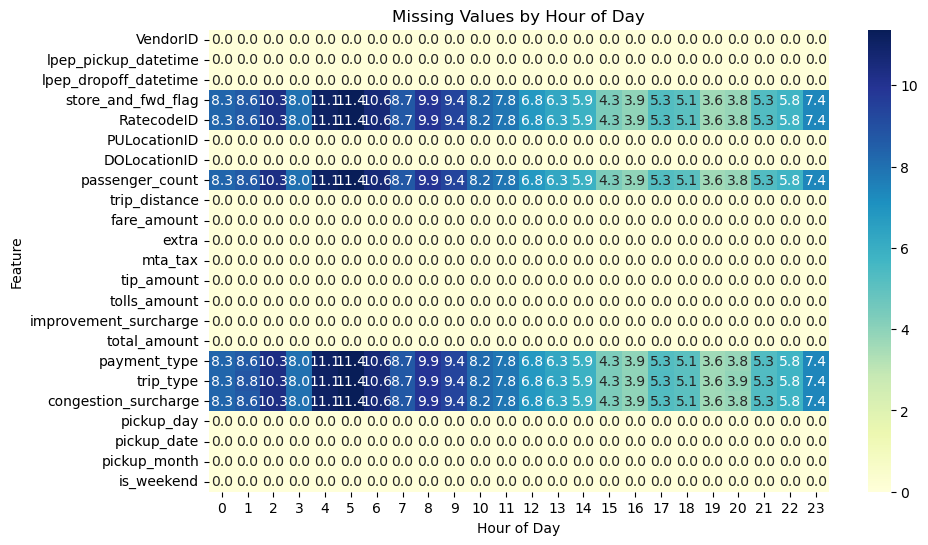

In [ ]:
# Calculate missing data percentage by pickup hour
hourly_missing_data = df.groupby('pickup_hour').apply(lambda x: x.isnull().mean() * 100, include_groups=False)
print("Missing data percentage by Pickup Hour:\n", hourly_missing_data)

# Plot missing data by hour
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_missing_data.T, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Missing Values by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Feature")
plt.show()

Missing data percentage by Pickup Location ID:
               VendorID  lpep_pickup_datetime  lpep_dropoff_datetime  \
PULocationID                                                          
1             0.0       0.0                   0.0                     
3             0.0       0.0                   0.0                     
7             0.0       0.0                   0.0                     
9             0.0       0.0                   0.0                     
10            0.0       0.0                   0.0                     
...           ...       ...                   ...                     
261           0.0       0.0                   0.0                     
262           0.0       0.0                   0.0                     
263           0.0       0.0                   0.0                     
264           0.0       0.0                   0.0                     
265           0.0       0.0                   0.0                     

              store_and_fwd_

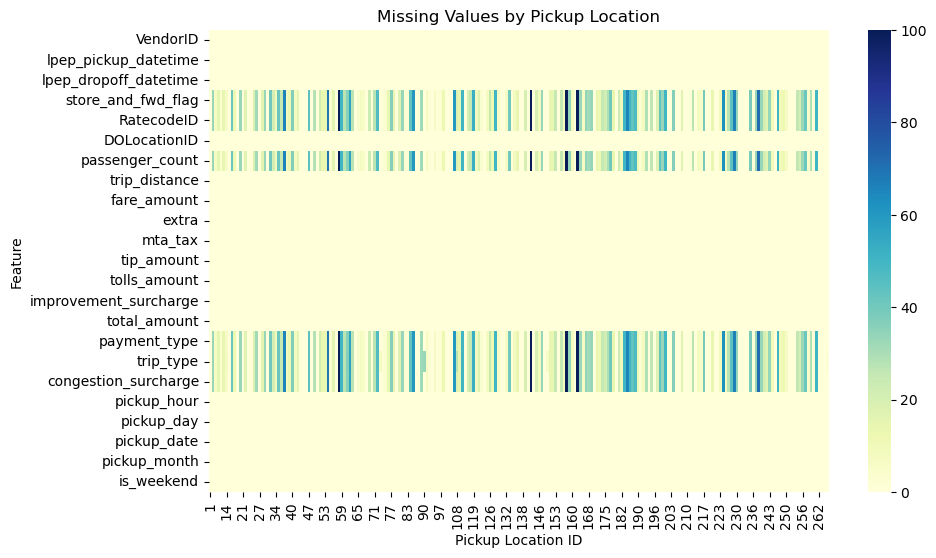

In [ ]:
# Location-based missing data analysis: check if missing data is location-related
# Calculate missing data percentage by pickup location ID
location_missing_data = df.groupby('PULocationID').apply(lambda x: x.isnull().mean() * 100, include_groups=False)

print("Missing data percentage by Pickup Location ID:\n", location_missing_data)

# Plot missing data by location
plt.figure(figsize=(10, 6))
sns.heatmap(location_missing_data.T, cmap="YlGnBu", annot=False)
plt.title("Missing Values by Pickup Location")
plt.xlabel("Pickup Location ID")
plt.ylabel("Feature")
plt.show()

Missing data percentage by Trip Distance Bins:
                         VendorID  lpep_pickup_datetime  lpep_dropoff_datetime  \
trip_distance                                                                   
(-120.099, 24019.768]   0.0       0.0                   0.0                     
(24019.768, 48039.536]  0.0       0.0                   0.0                     
(48039.536, 72059.304]  0.0       0.0                   0.0                     
(96079.072, 120098.84]  0.0       0.0                   0.0                     

                        store_and_fwd_flag  RatecodeID  PULocationID  \
trip_distance                                                          
(-120.099, 24019.768]   6.333661            6.333661    0.0            
(24019.768, 48039.536]  100.000000          100.000000  0.0            
(48039.536, 72059.304]  100.000000          100.000000  0.0            
(96079.072, 120098.84]  100.000000          100.000000  0.0            

                        DOLocati

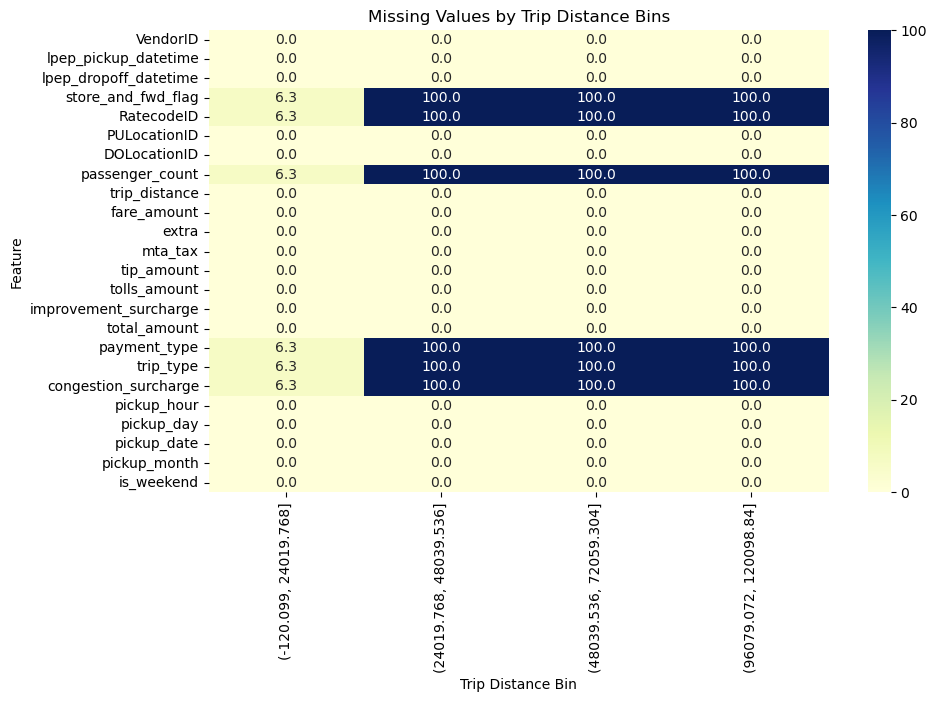

In [ ]:

# Check if shorter or longer trips have more missing values

distance_missing = df.groupby(pd.cut(df['trip_distance'], bins=5), observed=True).apply(lambda x: x.isnull().mean() * 100)

print("Missing data percentage by Trip Distance Bins:\n", distance_missing)

# Plot missing data by trip distance bins
plt.figure(figsize=(10, 6))
sns.heatmap(distance_missing.T, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Missing Values by Trip Distance Bins")
plt.xlabel("Trip Distance Bin")
plt.ylabel("Feature")
plt.show()


Percentage of missing values grouped by pickup date:
             VendorID  lpep_pickup_datetime  lpep_dropoff_datetime  \
pickup_date                                                          
2009-01-01   0.0       0.0                   0.0                     
2022-12-09   0.0       0.0                   0.0                     
2023-01-01   0.0       0.0                   0.0                     
2023-01-02   0.0       0.0                   0.0                     
2023-01-03   0.0       0.0                   0.0                     
2023-01-04   0.0       0.0                   0.0                     
2023-01-05   0.0       0.0                   0.0                     
2023-01-06   0.0       0.0                   0.0                     
2023-01-07   0.0       0.0                   0.0                     
2023-01-08   0.0       0.0                   0.0                     
2023-01-09   0.0       0.0                   0.0                     
2023-01-10   0.0       0.0           

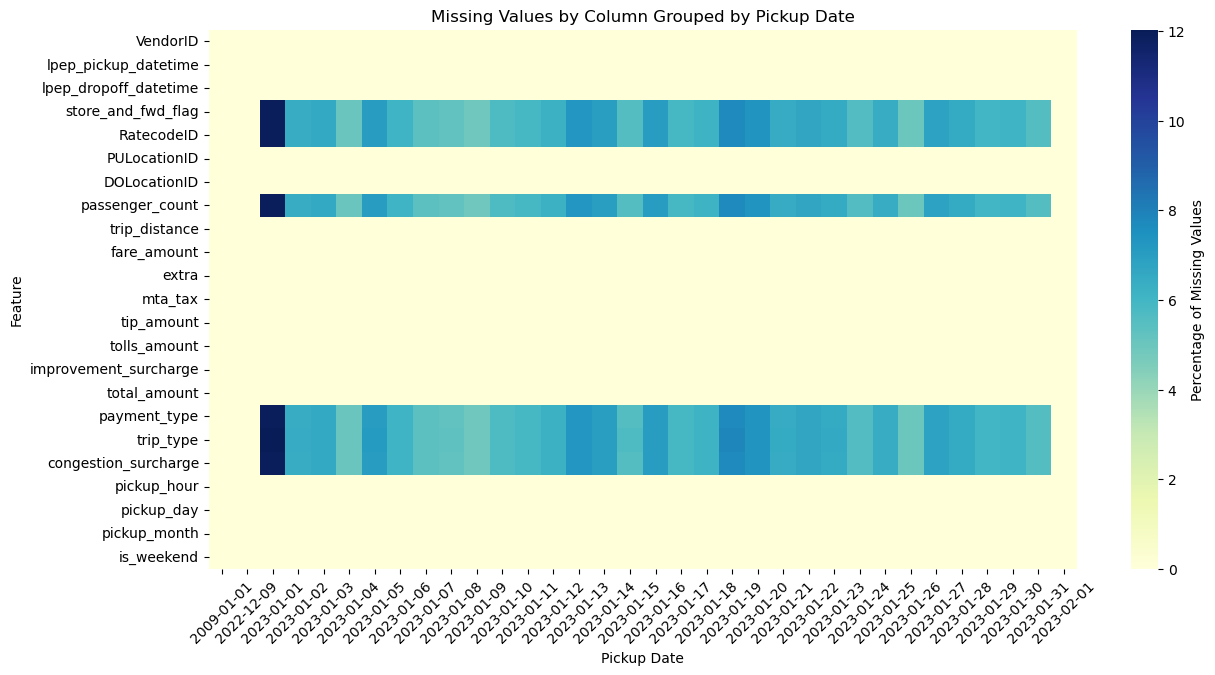

In [ ]:
# Group by the extracted date and calculate missing values
date_missing_data = df.groupby('pickup_date').apply(lambda x: x.isnull().mean() * 100, include_groups=False)


# Results
print("Percentage of missing values grouped by pickup date:")
print(date_missing_data)

# Plot the data for better understanding
plt.figure(figsize=(14, 7))
sns.heatmap(date_missing_data.T, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Percentage of Missing Values'})
plt.title("Missing Values by Column Grouped by Pickup Date")
plt.xlabel("Pickup Date")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filter rows where Passenger_count is 0
zero_passenger_data = df[df['passenger_count'] == 0]

# Calculate the percentage of missing values in the specified columns for zero-passenger rows
zero_passenger_missing = zero_passenger_data[['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 
                                              'payment_type', 'trip_type', 'congestion_surcharge']].isnull().mean() * 100

# Display the results
print("Percentage of missing values for rows with Passenger_count = 0:")
print(zero_passenger_missing)


Percentage of missing values for rows with Passenger_count = 0:
store_and_fwd_flag      0.0
RatecodeID              0.0
passenger_count         0.0
payment_type            0.0
trip_type               0.0
congestion_surcharge    0.0
dtype: float64


In [ ]:
# Calculate missing values grouped by RatecodeID for the specified columns
ratecode_missing_data = df.groupby('RatecodeID').apply(
    lambda x: x[['store_and_fwd_flag', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge']].isnull().mean() * 100
)

# Display the results
print("Percentage of missing values grouped by RatecodeID:")
print(ratecode_missing_data)


Percentage of missing values grouped by RatecodeID:
            store_and_fwd_flag  passenger_count  payment_type  trip_type  \
RatecodeID                                                                 
1.0         0.0                 0.0              0.0           0.0         
2.0         0.0                 0.0              0.0           0.0         
3.0         0.0                 0.0              0.0           0.0         
4.0         0.0                 0.0              0.0           0.0         
5.0         0.0                 0.0              0.0           0.0         
99.0        0.0                 0.0              0.0           100.0       

            congestion_surcharge  
RatecodeID                        
1.0         0.0                   
2.0         0.0                   
3.0         0.0                   
4.0         0.0                   
5.0         0.0                   
99.0        0.0                   


C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\2020027258.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratecode_missing_data = df.groupby('RatecodeID').apply(


In [ ]:
# Calculate overall missing values grouped by RatecodeID
overall_missing_data = df.groupby('RatecodeID').apply(lambda x: x.isnull().mean() * 100)

# Display the results
print("Overall percentage of missing values grouped by RatecodeID:")
print(overall_missing_data)


Overall percentage of missing values grouped by RatecodeID:
            VendorID  lpep_pickup_datetime  lpep_dropoff_datetime  \
RatecodeID                                                          
1.0         0.0       0.0                   0.0                     
2.0         0.0       0.0                   0.0                     
3.0         0.0       0.0                   0.0                     
4.0         0.0       0.0                   0.0                     
5.0         0.0       0.0                   0.0                     
99.0        0.0       0.0                   0.0                     

            store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
RatecodeID                                                               
1.0         0.0                 0.0         0.0           0.0            
2.0         0.0                 0.0         0.0           0.0            
3.0         0.0                 0.0         0.0           0.0            
4.0         0.0  

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\3646016541.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overall_missing_data = df.groupby('RatecodeID').apply(lambda x: x.isnull().mean() * 100)


C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\1516574351.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  overall_missing_data = df.groupby('RatecodeID', group_keys=False).apply(lambda x: x.isnull().mean() * 100)


<Figure size 1000x600 with 0 Axes>

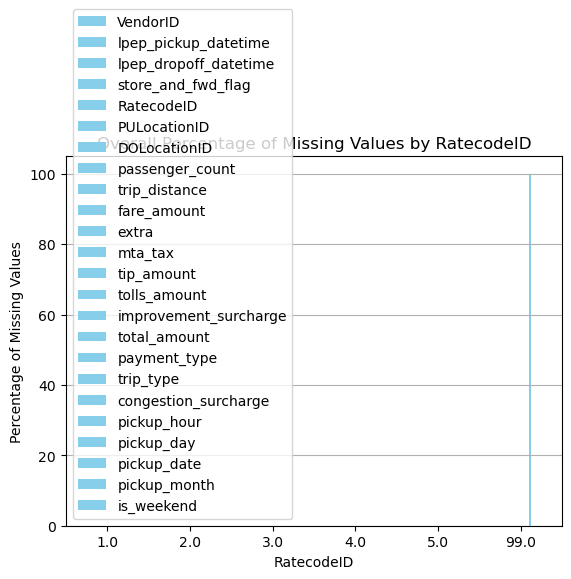

In [ ]:
# Calculate overall missing values grouped by RatecodeID without the DeprecationWarning
overall_missing_data = df.groupby('RatecodeID', group_keys=False).apply(lambda x: x.isnull().mean() * 100)

# Plotting overall missing values by RatecodeID
plt.figure(figsize=(10, 6))
overall_missing_data.plot(kind='bar', color='skyblue')
plt.title("Overall Percentage of Missing Values by RatecodeID")
plt.ylabel("Percentage of Missing Values")
plt.xlabel("RatecodeID")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [ ]:
# Filter the DataFrame for RatecodeID equal to 99
ratecode_99_data = df[df['RatecodeID'] == 99]
# Calculate the number of missing values for each column
missing_values_count_ratecode_99 = ratecode_99_data.isnull().sum()
#  result
print("Number of missing values for RatecodeID = 99:")
print(missing_values_count_ratecode_99)


Number of missing values for RatecodeID = 99:
VendorID                 0 
lpep_pickup_datetime     0 
lpep_dropoff_datetime    0 
store_and_fwd_flag       0 
RatecodeID               0 
PULocationID             0 
DOLocationID             0 
passenger_count          0 
trip_distance            0 
fare_amount              0 
extra                    0 
mta_tax                  0 
tip_amount               0 
tolls_amount             0 
improvement_surcharge    0 
total_amount             0 
payment_type             0 
trip_type                10
congestion_surcharge     0 
pickup_hour              0 
pickup_day               0 
pickup_date              0 
pickup_month             0 
is_weekend               0 
dtype: int64


After the detail investigation of the missing value grouped by certain variable it can be said that there is no pattern of the missing value.

In [ ]:
#melakukan treatment terhadap nilai minus

In [ ]:
# melakukan pemisahan pickup
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour         # Extract hour
df['pickup_day'] = df['lpep_pickup_datetime'].dt.dayofweek      # 0 = Monday, 6 = Sunday


---


In [ ]:
# determining the name of the file
file_name = 'NYC_Trip_cleaned.xlsx'

# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [ ]:
print(df[['pickup_hour', 'pickup_day', 'pickup_month', 'is_weekend']].head())

   pickup_hour  pickup_day  pickup_month  is_weekend
0  0            6           1             1         
1  0            6           1             1         
2  0            6           1             1         
3  0            6           1             1         
4  0            6           1             1         


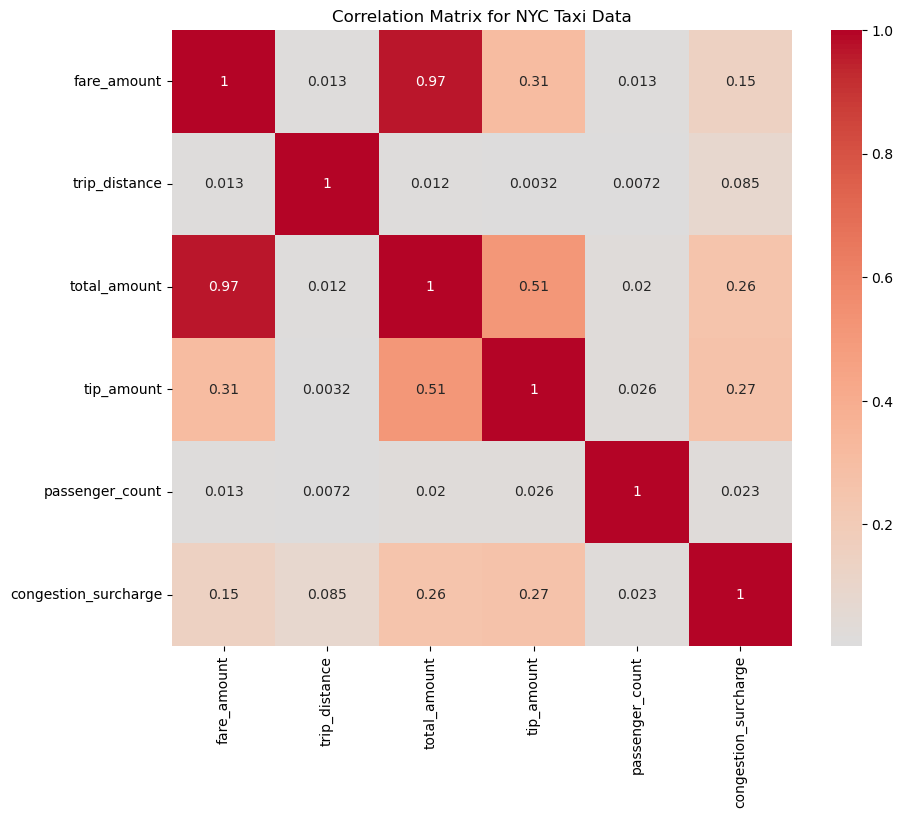

In [ ]:
# Select relevant numerical columns for correlation analysis
numerical_cols = ['fare_amount', 'trip_distance', 'total_amount', 'tip_amount', 'passenger_count', 'congestion_surcharge']

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for NYC Taxi Data')
plt.show()

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\2027013295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_hour', palette='Blues')


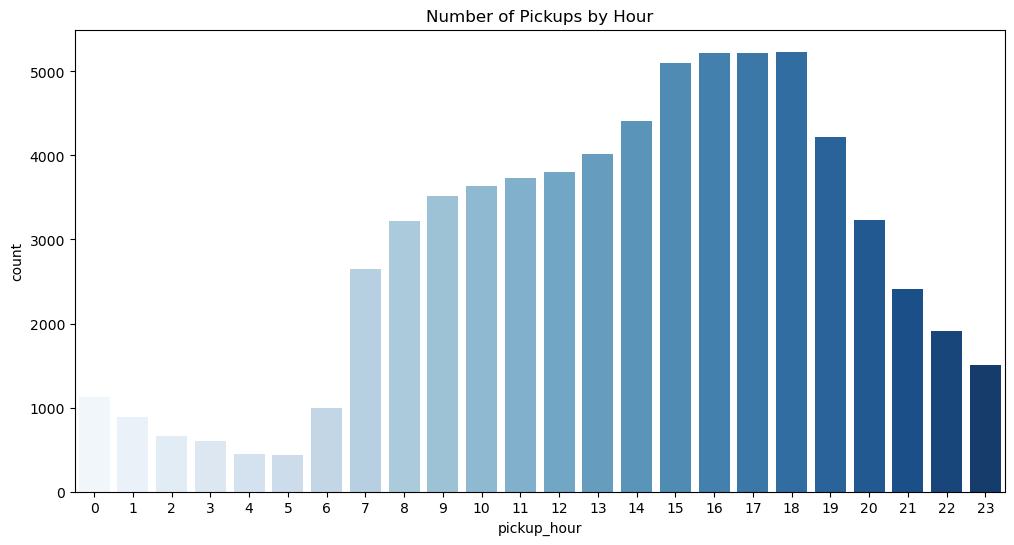

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\2027013295.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_day', palette='Greens')


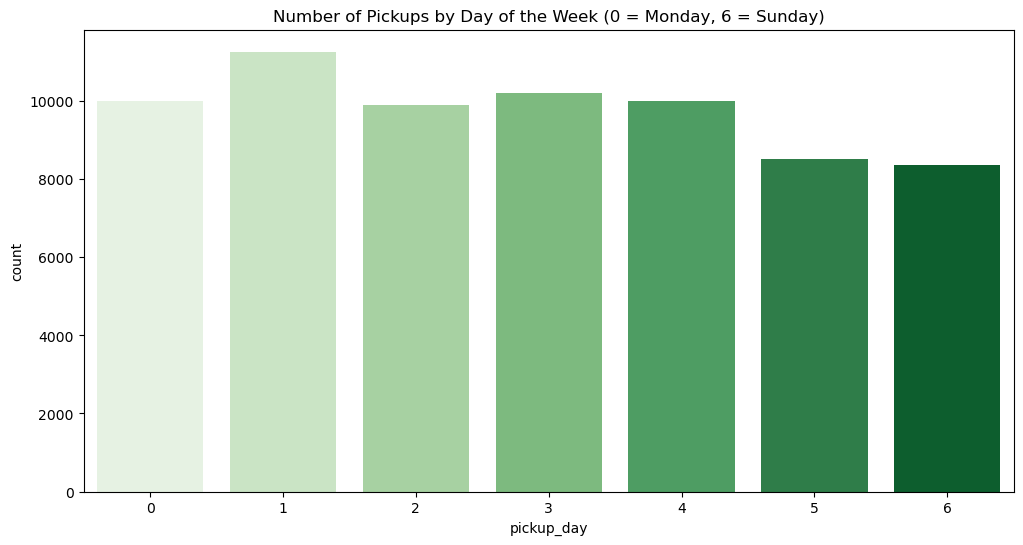

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\2027013295.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pickup_month', palette='Purples')


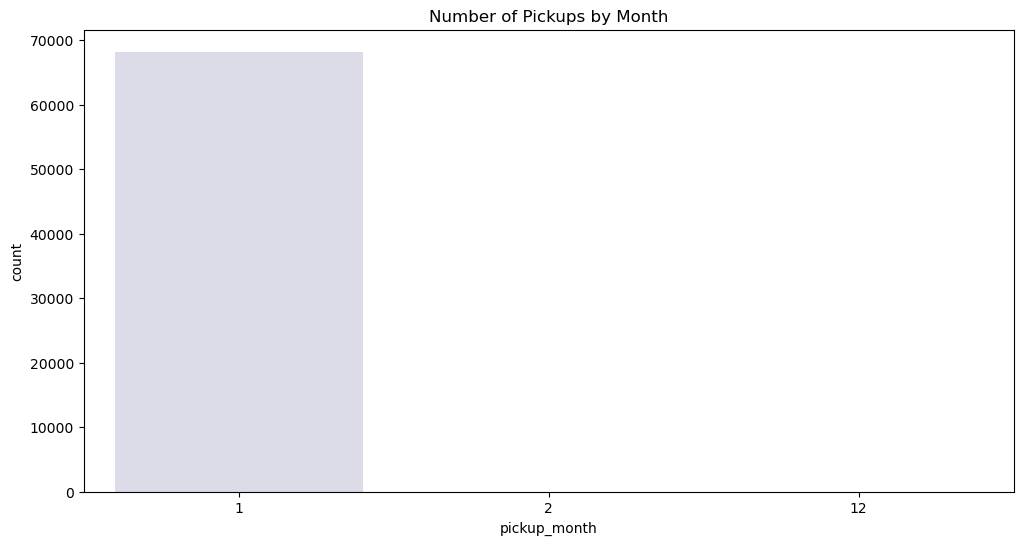

In [ ]:
# Plot pickup hour distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_hour', palette='Blues')
plt.title('Number of Pickups by Hour')
plt.show()

# Plot pickup day distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_day', palette='Greens')
plt.title('Number of Pickups by Day of the Week (0 = Monday, 6 = Sunday)')
plt.show()

# Monthly pickup trend
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='pickup_month', palette='Purples')
plt.title('Number of Pickups by Month')
plt.show()

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\3186807580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.index, y=top_pickups.values, palette='Reds')


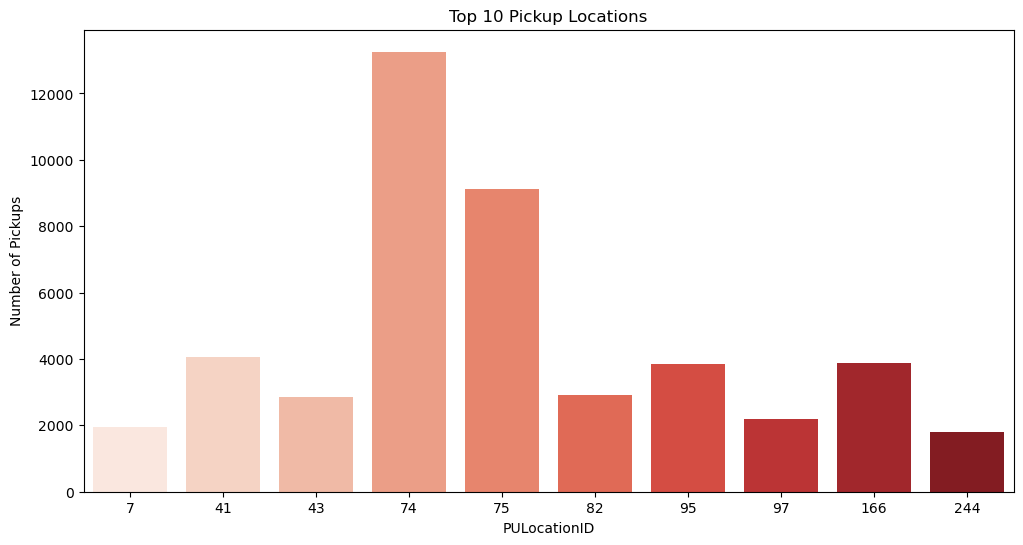

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\3186807580.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dropoffs.index, y=top_dropoffs.values, palette='Blues')


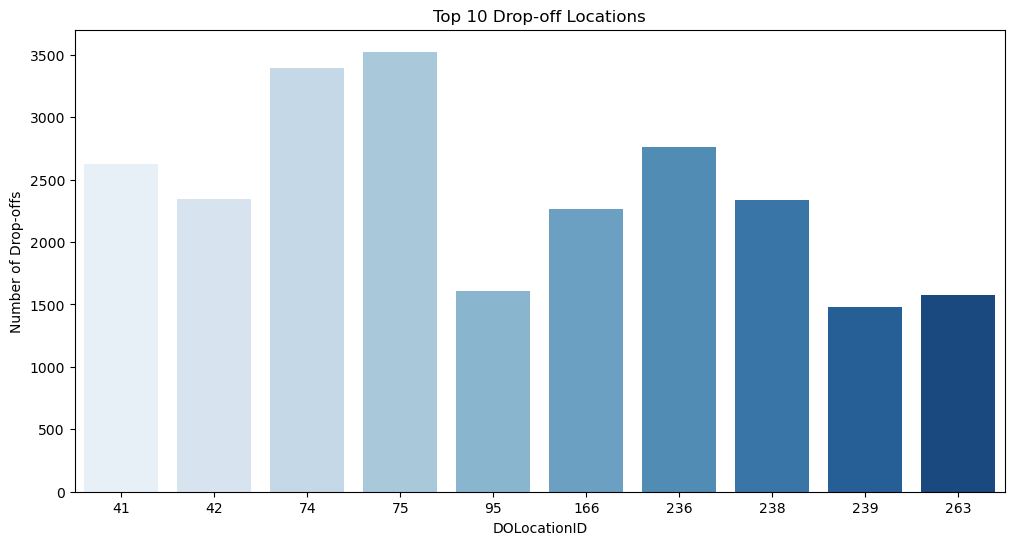

In [ ]:
# Top 10 pickup locations
top_pickups = df['PULocationID'].value_counts().head(10)
top_dropoffs = df['DOLocationID'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pickups.index, y=top_pickups.values, palette='Reds')
plt.title('Top 10 Pickup Locations')
plt.xlabel('PULocationID')
plt.ylabel('Number of Pickups')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_dropoffs.index, y=top_dropoffs.values, palette='Blues')
plt.title('Top 10 Drop-off Locations')
plt.xlabel('DOLocationID')
plt.ylabel('Number of Drop-offs')
plt.show()


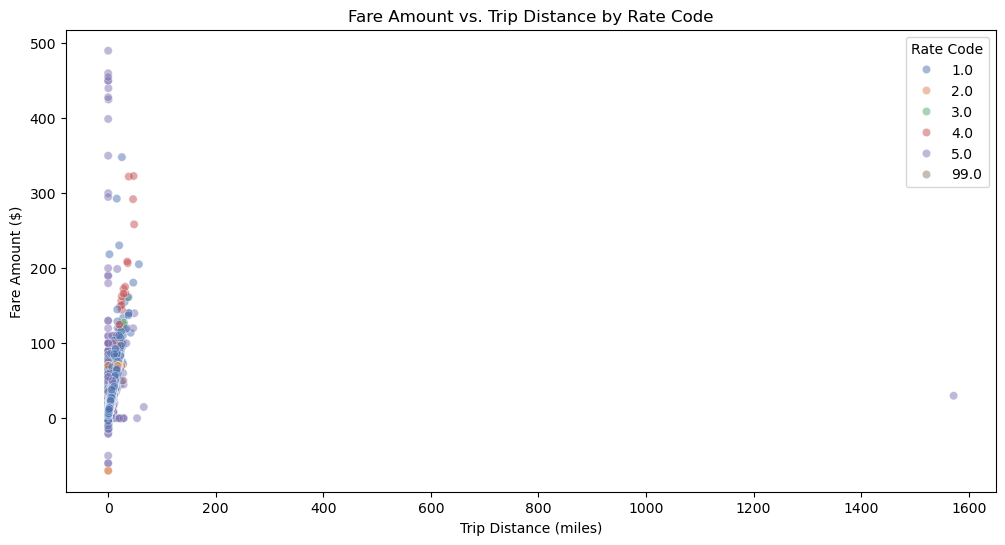

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='trip_distance', y='fare_amount', hue='RatecodeID', palette='deep', alpha=0.5)
plt.title('Fare Amount vs. Trip Distance by Rate Code')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.legend(title='Rate Code')
plt.show()

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_26188\2477333983.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trip_pairs, x='Route', y='Trip_Count', palette='viridis')


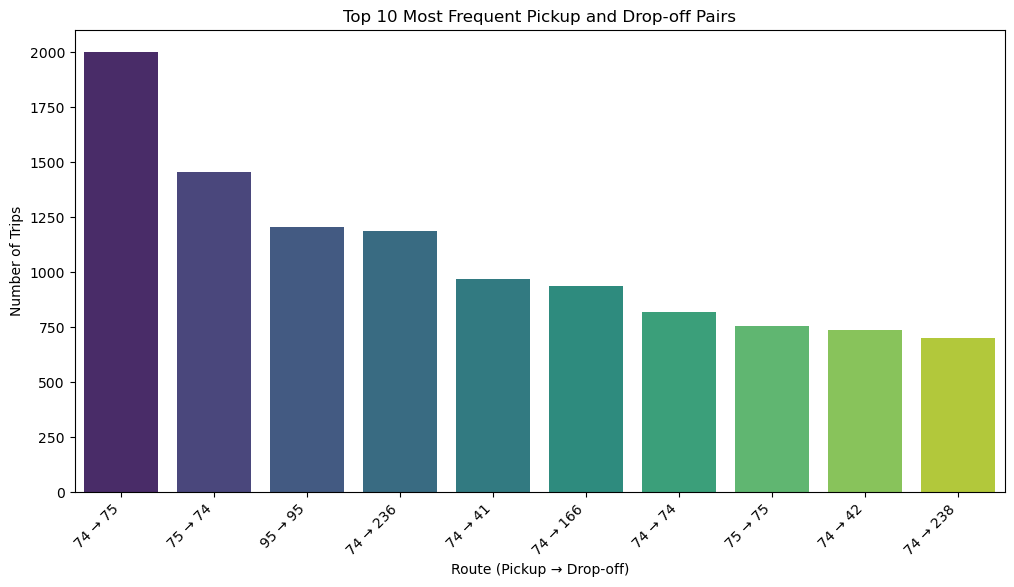

In [ ]:


trip_pairs = (
    df.groupby(['PULocationID', 'DOLocationID'])
    .size()
    .reset_index(name='Trip_Count')
    .sort_values(by='Trip_Count', ascending=False)
    .head(10)
)

# Create a new column for route names
trip_pairs['Route'] = trip_pairs['PULocationID'].astype(str) + ' → ' + trip_pairs['DOLocationID'].astype(str)

# Plott
plt.figure(figsize=(12, 6))
sns.barplot(data=trip_pairs, x='Route', y='Trip_Count', palette='viridis')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Top 10 Most Frequent Pickup and Drop-off Pairs')
plt.xlabel('Route (Pickup → Drop-off)')
plt.ylabel('Number of Trips')
plt.show()


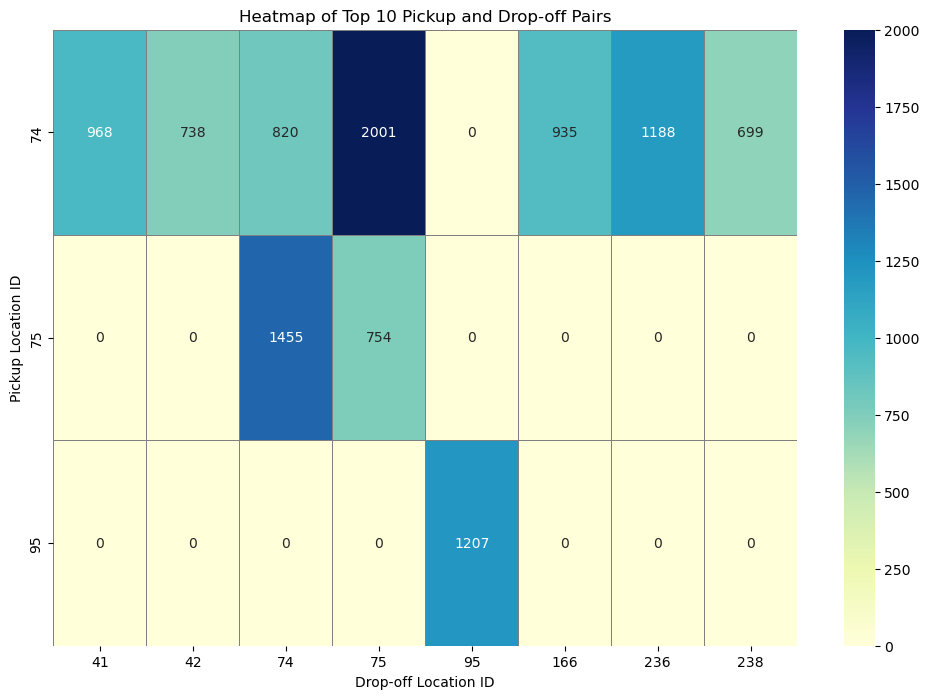

In [ ]:
pivot_table = trip_pairs.pivot_table(
    index='PULocationID', 
    columns='DOLocationID', 
    values='Trip_Count', 
    fill_value=0
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Top 10 Pickup and Drop-off Pairs')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Pickup Location ID')
plt.show()

In [ ]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Group by pickup and dropoff zones and calculate average trip duration
longest_trip_zones = (
    df.groupby(['PULocationID', 'DOLocationID'])['trip_duration']
    .mean()
    .reset_index()
    .sort_values(by='trip_duration', ascending=False)
    .head(10)  # Show top 10 longest trip pairs
)

print("Top 10 Pickup and Drop-off Zones with Longest Trip Duration:")
print(longest_trip_zones)

Top 10 Pickup and Drop-off Zones with Longest Trip Duration:
      PULocationID  DOLocationID  trip_duration
711   36            137           1423.216667  
4054  167           60            1386.766667  
3094  116           161           1368.483333  
4256  179           114           1357.116667  
246   17            256           1282.833333  
766   37            137           1265.400000  
3277  129           16            1246.166667  
1641  65            178           886.066667   
2732  95            86            800.866667   
812   40            40            718.716667   


In [ ]:
# Cari jumlah penumpang yang anomalies
unusual_passenger_count = df[(df['passenger_count'] <= 0) | (df['passenger_count'] > 6)]

print("\nPerjalanan dengan jumlah penumpang anomalies:")
print(unusual_passenger_count[['PULocationID', 'DOLocationID', 'passenger_count']])


Perjalanan dengan jumlah penumpang anomalies:
       PULocationID  DOLocationID  passenger_count
99     168           168           0.0            
254    129           129           0.0            
446    260           260           0.0            
486    42            127           0.0            
487    75            236           0.0            
...    ..            ...           ...            
63239  145           145           0.0            
63247  236           236           0.0            
63288  260           260           0.0            
63420  145           145           0.0            
63421  145           145           0.0            

[344 rows x 3 columns]


In [ ]:
# Perjalanan dengan pickup dan drop-off di lokasi yang sama, tapi tarif tinggi
unusual_zone = df[(df['PULocationID'] == df['DOLocationID']) & (df['fare_amount'] > 50)]

print("\nPerjalanan dengan pickup dan drop-off di zona sama tapi tarif tinggi:")
print(unusual_zone[['PULocationID', 'DOLocationID', 'fare_amount', 'trip_duration']])


Perjalanan dengan pickup dan drop-off di zona sama tapi tarif tinggi:
       PULocationID  DOLocationID  fare_amount  trip_duration
104    179           179           190.00       0.083333     
163    36            36            100.00       0.050000     
185    223           223           110.00       1.766667     
198    101           101           90.00        0.500000     
199    101           101           60.00        0.400000     
...    ...           ...             ...             ...     
63131  55            55            85.60        98.850000    
63838  95            95            55.00        0.183333     
65122  193           193           50.26        4.000000     
66040  55            55            80.04        2.000000     
66609  132           132           78.25        1.000000     

[170 rows x 4 columns]


In [ ]:
# Perjalanan dengan tarif nol atau negatif
unusual_fare = df[df['fare_amount'] <= 0]

print("\nPerjalanan dengan tarif nol atau negatif:")
print(unusual_fare[['PULocationID', 'DOLocationID', 'fare_amount', 'trip_distance']])

# Perjalanan dengan tarif sangat tinggi tetapi jarak pendek
unreasonable_fare = df[(df['fare_amount'] > 200) & (df['trip_distance'] < 5)]

print("\nPerjalanan dengan tarif sangat tinggi dan jarak pendek:")
print(unreasonable_fare[['PULocationID', 'DOLocationID', 'fare_amount', 'trip_distance']])



Perjalanan dengan tarif nol atau negatif:
       PULocationID  DOLocationID  fare_amount  trip_distance
662    75            74           -3.00         0.17         
898    193           193          -3.00         0.00         
1317   129           82           -8.60         0.64         
1581   264           264           0.00         0.00         
1686   75            75           -4.50         0.77         
...    ..            ..             ...          ...         
64376  25            25           -27.96        0.13         
64487  116           151          -43.54        2.22         
65108  168           159          -17.38        3.45         
66459  166           166          -35.01        0.38         
67461  248           126          -15.53        1.51         

[259 rows x 4 columns]

Perjalanan dengan tarif sangat tinggi dan jarak pendek:
       PULocationID  DOLocationID  fare_amount  trip_distance
2014   223           223           218.6        2.35         
7906   9

In [ ]:
#melakukan payment analysis

payment_analysis = (
    df.groupby('payment_type')
    .agg(
        total_income=('total_amount', 'sum'),  # Total income from each payment type
        avg_income_per_trip=('total_amount', 'mean'),  # Average income per trip
        total_tip=('tip_amount', 'sum'),  # Total tips
        avg_tip_per_trip=('tip_amount', 'mean'),  # Average tip per trip
        trip_count=('payment_type', 'size')  # Total number of trips
    )
    .reset_index()
    .sort_values(by='trip_count', ascending=False)  # Sort by trip count
)

# Map payment_type codes to meaningful names
payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
payment_analysis['payment_type'] = payment_analysis['payment_type'].map(payment_type_mapping)

print("Payment Method Analysis:")
print(payment_analysis)

Payment Method Analysis:
  payment_type  total_income  avg_income_per_trip  total_tip  \
0  Credit Card  936029.08     23.006171            130400.36   
1  Cash         415877.50     18.375641            5.00        
2  No Charge    2176.00       4.610169             0.00        
3  Dispute      408.95        4.304737             0.00        
4  Unknown      29.50         14.750000            0.00        

   avg_tip_per_trip  trip_count  
0  3.205043          40686       
1  0.000221          22632       
2  0.000000          472         
3  0.000000          95          
4  0.000000          2           


In [ ]:
#Melakukan kalulasi trip dalam menit
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Group by VendorID 
vendor_performance = (
    df.groupby('VendorID')
    .agg(
        avg_trip_duration=('trip_duration', 'mean'),
        avg_trip_distance=('trip_distance', 'mean'),
        total_trips=('VendorID', 'size'),
        avg_fare_amount=('fare_amount', 'mean'),
        avg_tip_amount=('tip_amount', 'mean')
    )
    .reset_index()
)

print("Vendor Performance Comparison:")
print(vendor_performance)

Vendor Performance Comparison:
   VendorID  avg_trip_duration  avg_trip_distance  total_trips  \
0  1         15.589420          2.236733           9343          
1  2         18.495294          9.047774           58868         

   avg_fare_amount  avg_tip_amount  
0  16.376213        1.665342        
1  16.639626        2.214189        


--
**Gunakan melb_data.csv (Melbourne House Data) dengan:**
Do the rides that originate from certain areas tend to generate more revenue?
Does the distance of a trip considerably impact the received tip?
Does the average fare differ with modes of payment, such as cash versus credit card?
1. Does Time of Day Impact Fare Amounts?
Hypothesis: The objective is to test if there is a significant difference between the amount of fares at different parts of the day-for example, morning and evening.
Example:
H₀: The mean amount of fare is the same for different times of day.
H₁: There is a significant difference in the average fare amount by time of day, such as rush hours versus off-peak hours.
This type of analysis could be helpful in determining the best times to make more drivers available in order to increase revenues.

2. Is There Seasonal Variation in Trip Demand?
Hypothesis: Test for a significant difference in the number of trips across seasons or months.
Example:
H₀: The number of trips is equal across all seasons.
H₁: There is some significant difference in the number of trips across seasons.
If you find seasonality, that could be helpful to adjust fleet size or marketing effort in high demand periods.

3. Is the Number of Passengers Influencing the Fare Amount?
Hypothesis: Check if larger groups are willing to pay more, or if the number of passengers influences the fare amount pricing.
Example:
H₀: Number of passengers and fare amount are independent.
H₁: There is a significant difference in fare amount depending on the number of passengers.
This could be enlightening about shared vs. individual ride fare strategies.
 
4. Does the Tip Amount Differ Due to Payment Type?
Hypothesis: Use a t-test to determine if credit card vs. cash determines different tip amounts.
Example:
H₀: The average fare tip is equal for credit card payments as well as cash payments.
H₁: Credit card and cash are yielding significantly different average tip amounts.
Knowing these patterns in tipping due to payment type may provide an indication of how to incentivize certain types of payments.

5. Is Trip Distance a More Important Predictor of Total Amounts Compared with Other Variables?
Hypothesis: Determine if trip distance is most influential with respect to total trip revenue compared with other variables such as duration of trip or rate code.
Example:
Ho: Trip distance is no more influential determinant of total amount compared to other factors.
H1: Trip distance is a more influential determinant of the total amount compared to other factors.
The test described will support or reject the supposition that longer trips will always generate more money and therefore shape the pricing and distance strategies.

6. Are Fares from Airport Locations Significantly Higher Than Non-Airport Locations?
Hypothesis: Determine if the average fares for trips that begin or end in major airport locations, such as JFK or Newark, are higher compared to others. Example: H₀: Average fares in airport and non-airport locations are equal. H₁: Average fares for airport locations are much higher. This will be useful insight that feeds targeted services or dynamic pricing models for airport trips.

7. Do Store-and-Forward Trips (Disconnected Trips) Differ in Revenue?
Hypothesis-Check whether the trips which were flagged as store-and-forward due to temporary network disconnects, generate different revenues compared to regular trips. Example: H0 : the average fare amount of the store-and-forward trips is equal to the fare amount in regular trips. H1: there is a significant difference between store-and-forward trips and regular trips in terms of fare amount. This might show if the network connectivity is affecting the value of fares, that could have an implication in the collection process.


Test 1: Difference in Average Fare by Payment Type
This test will check if payment type impacts the average fare amount.

In [ ]:
from scipy import stats

# Filter dataset for valid payment types
data_filtered = df[df['payment_type'].isin([1, 2])]  

# Extract fare amounts by payment type
fare_credit = data_filtered[data_filtered['payment_type'] == 1]['fare_amount']
fare_cash = data_filtered[data_filtered['payment_type'] == 2]['fare_amount']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(fare_credit, fare_cash)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in average fare by payment type.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average fare by payment type.")

ANOVA F-statistic: 38.317341404464365
ANOVA p-value: 6.04934851031627e-10
Reject the null hypothesis: Significant difference in average fare by payment type.


Test 2: Impact of Trip Distance on Tip Amount

In [ ]:
# Use Pearson correlation test
correlation, p_value = stats.pearsonr(df['trip_distance'], df['tip_amount'])
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation between trip distance and tip amount.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between trip distance and tip amount.")

Correlation coefficient: 0.003216151340618096
p-value: 0.40093271811946296
Fail to reject the null hypothesis: No significant correlation between trip distance and tip amount.


Test 3: Do High-Volume Zones Generate Higher Total Revenue?
This test will check if there’s a significant difference in total revenue for trips originating in high-demand zones versus low-demand zones.

In [ ]:
# Define high-demand zones (top 10% by trip count)
top_zones = df['PULocationID'].value_counts().head(int(len(df) * 0.1)).index
df['is_high_demand'] = df['PULocationID'].apply(lambda x: 1 if x in top_zones else 0)

# Separate data into high-demand and low-demand zone trips
high_demand_fares = df[df['is_high_demand'] == 1]['total_amount']
low_demand_fares = df[df['is_high_demand'] == 0]['total_amount']

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_demand_fares, low_demand_fares, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: High-demand zones have significantly different total revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference in total revenue between high and low-demand zones.")

t-statistic: nan
p-value: nan
Fail to reject the null hypothesis: No significant difference in total revenue between high and low-demand zones.


3. Statistical Inference and Confidence Intervals
For added robustness, calculate confidence intervals for mean fare or revenue in high-demand vs. low-demand zones.


In [ ]:
# Calculate 95% confidence interval for high-demand zones
high_demand_mean = high_demand_fares.mean()
high_demand_std = high_demand_fares.std()
high_demand_n = len(high_demand_fares)
high_demand_conf_interval = stats.norm.interval(0.95, loc=high_demand_mean, scale=high_demand_std / np.sqrt(high_demand_n))

print("95% Confidence Interval for High-Demand Zone Revenue:", high_demand_conf_interval)

95% Confidence Interval for High-Demand Zone Revenue: (21.673379690258503, 21.905375056043408)
